### Banglore House Prediction Model 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_excel("C://Users//navs9//Downloads//Bengaluru_House_Data.xlsx")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2023-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,2023-06-18 00:00:00,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
#finding columns
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [12]:
#deleting unwanted columns
df2 = df.drop(['area_type','society','availability'],axis='columns')
df2

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [14]:
#checking data types
df2.dtypes

location       object
size           object
total_sqft     object
bath          float64
balcony       float64
price         float64
dtype: object

In [15]:
# Renaming columns
df2.rename(columns={'location': 'Location', 'size': 'Type', 'total_sqft':'Total_sqft_area_available','bath':'Bathrooms_available','balcony':'No_of_balcony','price':'Price_per_sqft'}, inplace=True)

In [16]:
df2

,Location,Type,Total_sqft_area_available,Bathrooms_available,No_of_balcony,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


### Data cleaning 

In [17]:
#deleting duplicate rows
df2.drop_duplicates(inplace=True)
df2

,Location,Type,Total_sqft_area_available,Bathrooms_available,No_of_balcony,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


In [18]:
#Checking null values in each column
df2.isna().sum()

Location                       1
Type                          16
Total_sqft_area_available      0
Bathrooms_available           72
No_of_balcony                603
Price_per_sqft                 0
dtype: int64

In [19]:
#deleting unwanted columns
df2 = df2.drop(['No_of_balcony'],axis='columns')
df2

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [20]:
#Checking null values in each column
df2.isna().sum()

Location                      1
Type                         16
Total_sqft_area_available     0
Bathrooms_available          72
Price_per_sqft                0
dtype: int64

In [21]:
df2.dtypes

Location                      object
Type                          object
Total_sqft_area_available     object
Bathrooms_available          float64
Price_per_sqft               float64
dtype: object

In [22]:
#replacing null value of column Location as unknown
df2['Location'].fillna('Unknown', inplace=True)

In [23]:
#since usage of central tendencies is not advisable type and bathrooms columns, so deleting the null values
df3 = df2.dropna()
df3.isnull().sum()

Location                     0
Type                         0
Total_sqft_area_available    0
Bathrooms_available          0
Price_per_sqft               0
dtype: int64

In [25]:
df3

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [27]:
#outlier removing using measures of central tendency
a=df3['Price_per_sqft'].quantile(0.25)
b=df3['Price_per_sqft'].quantile(0.75)
iqr = b - a
iqr_lower_bound = a - (1.5 * iqr)
iqr_upper_bound = b + (1.5 * iqr)
df4=df3[(df3['Price_per_sqft']<iqr_upper_bound)&(df3['Price_per_sqft']>iqr_lower_bound)]
#df4 is new data frame after removing outliers
df4

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13309,Yeshwanthpur,3 BHK,1675,3.0,92.13
13310,Rachenahalli,2 BHK,1050,2.0,52.71
13312,Bellandur,2 BHK,1262,2.0,47.00
13314,Green Glen Layout,3 BHK,1715,3.0,112.00


In [33]:
#adding new column bhk to get number of bedrooms from type column
df4['bhk'] = df4['Type'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\navs9\AppData\Local\Temp\ipykernel_12252\790214259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bhk'] = df4['Type'].apply(lambda x: int(x.split(' ')[0]))


In [34]:
df4

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13309,Yeshwanthpur,3 BHK,1675,3.0,92.13,3
13310,Rachenahalli,2 BHK,1050,2.0,52.71,2
13312,Bellandur,2 BHK,1262,2.0,47.00,2
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3


In [47]:
#coverting Total_sqft_area_available column to numerical value
df5 = pd.DataFrame(df4)
df5['Total_sqft_area_available'] = pd.to_numeric(df4['Total_sqft_area_available'], errors='coerce').astype(float)
df5

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13309,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3
13310,Rachenahalli,2 BHK,1050.0,2.0,52.71,2
13312,Bellandur,2 BHK,1262.0,2.0,47.00,2
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3


In [48]:
df5.dtypes

Location                      object
Type                          object
Total_sqft_area_available    float64
Bathrooms_available          float64
Price_per_sqft               float64
bhk                            int64
dtype: object

### Data encoding 

In [35]:
#one-hot encoding
#Converting data into pandas dataframe
#importing libraries
from sklearn.preprocessing import OneHotEncoder

In [36]:
#method 1
ohe= OneHotEncoder()

In [52]:
#forming arrays
df_ar=ohe.fit_transform(df5[['Location','Type','Total_sqft_area_available','Bathrooms_available','Price_per_sqft','bhk']]).toarray()
df_ar

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
df6=pd.DataFrame(df_ar)
df6

,0,1,2,3,4,5,6,7,8,9,...,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#method 2
df7 = pd.DataFrame(df5)

# Perform one-hot encoding for Location column
df_encoded = pd.get_dummies(df7, columns=['Location'])

df_encoded

,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk,Location_ Anekal,Location_ Banaswadi,Location_ Basavangudi,Location_ Bhoganhalli,Location_ Devarabeesana Halli,...,Location_poornaprajna layout,"Location_ravindra nagar, T.dasarahalli peenya",Location_rr nagar,Location_sankeswari,Location_sapthagiri Layout,Location_singapura paradise,Location_t.c palya,Location_tc.palya,Location_vinayakanagar,Location_whitefiled
0,2 BHK,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4 Bedroom,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3 BHK,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3 BHK,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2 BHK,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,3 BHK,1675.0,3.0,92.13,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13310,2 BHK,1050.0,2.0,52.71,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13312,2 BHK,1262.0,2.0,47.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13314,3 BHK,1715.0,3.0,112.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
#after deleting Type column
df7

,Location,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13309,Yeshwanthpur,1675.0,3.0,92.13,3
13310,Rachenahalli,1050.0,2.0,52.71,2
13312,Bellandur,1262.0,2.0,47.00,2
13314,Green Glen Layout,1715.0,3.0,112.00,3


In [69]:
#label encoder
#saving cleaned dataset df5 in new file
df5.to_excel('Banglore_House_Pricing_Cleaned_Dataset.xlsx',index=False)

In [67]:
#import library
from sklearn.preprocessing import LabelEncoder

In [68]:
l=LabelEncoder()
print(l)

LabelEncoder()


In [70]:
df_label=pd.read_excel('Banglore_House_Pricing_Cleaned_Dataset.xlsx')
df_label['Location']=l.fit_transform(df_label['Location'])

In [71]:
df_label

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,385,2 BHK,1056.0,2,39.07,2
1,292,4 Bedroom,2600.0,5,120.00,4
2,1095,3 BHK,1440.0,2,62.00,3
3,700,3 BHK,1521.0,3,95.00,3
4,662,2 BHK,1200.0,2,51.00,2
...,...,...,...,...,...,...
11267,1177,3 BHK,1675.0,3,92.13,3
11268,893,2 BHK,1050.0,2,52.71,2
11269,217,2 BHK,1262.0,2,47.00,2
11270,439,3 BHK,1715.0,3,112.00,3


In [72]:
#To decode the first encoded value
encoded_value = df_label['Location'][0]
original_value = l.inverse_transform([encoded_value])
print(f"Encoded Value: {encoded_value}, Original Value: {original_value[0]}")

Encoded Value: 385, Original Value: Electronic City Phase II


In [74]:
#Creating a DataFrame to store decoded values
decoded_values_df = pd.DataFrame({
    'Encoded_Value': df_label['Location'],
    'Original_Value': l.inverse_transform(df_label['Location'])
})

# Print the DataFrame
print(decoded_values_df)

       Encoded_Value            Original_Value
0                385  Electronic City Phase II
1                292          Chikka Tirupathi
2               1095               Uttarahalli
3                700        Lingadheeranahalli
4                662                  Kothanur
...              ...                       ...
11267           1177              Yeshwanthpur
11268            893              Rachenahalli
11269            217                 Bellandur
11270            439         Green Glen Layout
11271            900     Raja Rajeshwari Nagar

[11272 rows x 2 columns]


In [75]:
#Converting the DataFrame to a list
decoded_values_list = decoded_values_df.values.tolist()
print(decoded_values_list)

[[385, 'Electronic City Phase II'], [292, 'Chikka Tirupathi'], [1095, 'Uttarahalli'], [700, 'Lingadheeranahalli'], [662, 'Kothanur'], [1163, 'Whitefield'], [831, 'Old Airport Road'], [741, 'Marathahalli'], [1163, 'Whitefield'], [59, '7th Phase JP Nagar'], [431, 'Gottigere'], [960, 'Sarjapur'], [775, 'Mysore Road'], [246, 'Bisuvanahalli'], [900, 'Raja Rajeshwari Nagar'], [730, 'Manayata Tech Park'], [635, 'Kengeri'], [245, 'Binny Pete'], [217, 'Bellandur'], [9, ' Thanisandra'], [731, 'Mangammanapalya'], [383, 'Electronic City'], [1163, 'Whitefield'], [915, 'Ramagondanahalli'], [383, 'Electronic City'], [1171, 'Yelahanka'], [246, 'Bisuvanahalli'], [476, 'Hebbal'], [900, 'Raja Rajeshwari Nagar'], [621, 'Kasturi Nagar'], [613, 'Kanakpura Road'], [388, 'Electronics City Phase 1'], [677, 'Kundalahalli'], [299, 'Chikkalasandra'], [1095, 'Uttarahalli'], [772, 'Murugeshpalya'], [961, 'Sarjapur  Road'], [403, 'Ganga Nagar'], [1171, 'Yelahanka'], [613, 'Kanakpura Road'], [458, 'HSR Layout'], [363

### Data analysis

In [76]:
df_label

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,385,2 BHK,1056.0,2,39.07,2
1,292,4 Bedroom,2600.0,5,120.00,4
2,1095,3 BHK,1440.0,2,62.00,3
3,700,3 BHK,1521.0,3,95.00,3
4,662,2 BHK,1200.0,2,51.00,2
...,...,...,...,...,...,...
11267,1177,3 BHK,1675.0,3,92.13,3
11268,893,2 BHK,1050.0,2,52.71,2
11269,217,2 BHK,1262.0,2,47.00,2
11270,439,3 BHK,1715.0,3,112.00,3


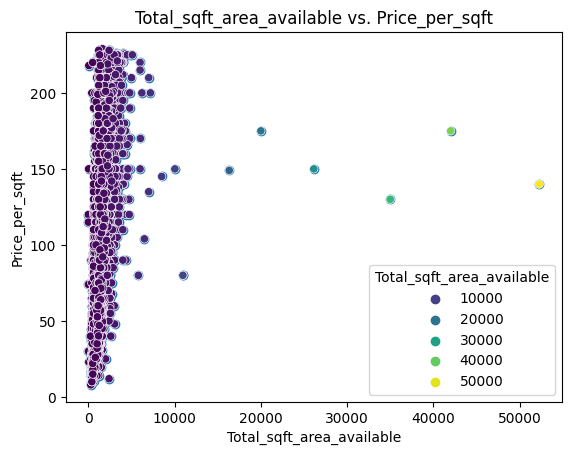

In [82]:
#scatter plot1
plt.scatter(df_label['Total_sqft_area_available'], df_label['Price_per_sqft'])
plt.xlabel('Total_sqft_area_available')
plt.ylabel('Price_per_sqft')
plt.title('Total_sqft_area_available vs. Price_per_sqft')
sns.scatterplot(x=df_label['Total_sqft_area_available'],y=df_label['Price_per_sqft'],hue=df_label['Total_sqft_area_available'],palette='viridis')
plt.show()

In [79]:
#Finding correlation
correlation=df_label['Total_sqft_area_available'].corr(df_label["Price_per_sqft"])
print("The Total_sqft_area_available vs. Price_per_sqft is",correlation)

The Total_sqft_area_available vs. Price_per_sqft is 0.38498470794479006


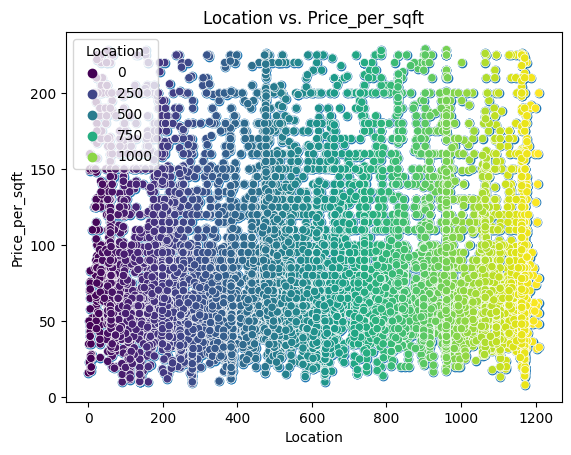

In [83]:
#scatter plot2
plt.scatter(df_label['Location'], df_label['Price_per_sqft'])
plt.xlabel('Location')
plt.ylabel('Price_per_sqft')
plt.title('Location vs. Price_per_sqft')
sns.scatterplot(x=df_label['Location'],y=df_label['Price_per_sqft'],hue=df_label['Location'],palette='viridis')
plt.show()

In [84]:
#Finding correlation
correlation=df_label['Location'].corr(df_label["Price_per_sqft"])
print("Location vs. Price_per_sqft is",correlation)

Location vs. Price_per_sqft is 0.018889088617983274


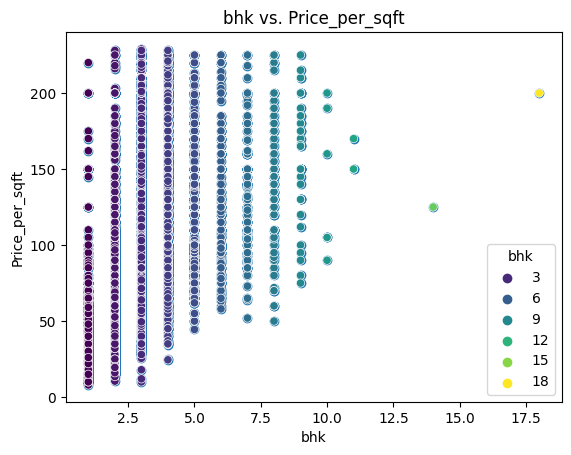

In [85]:
#scatter plot3
plt.scatter(df_label['bhk'], df_label['Price_per_sqft'])
plt.xlabel('bhk')
plt.ylabel('Price_per_sqft')
plt.title('bhk vs. Price_per_sqft')
sns.scatterplot(x=df_label['bhk'],y=df_label['Price_per_sqft'],hue=df_label['bhk'],palette='viridis')
plt.show()

In [86]:
#Finding correlation
correlation=df_label['bhk'].corr(df_label["Price_per_sqft"])
print("bhk vs. Price_per_sqft is",correlation)

bhk vs. Price_per_sqft is 0.5487056778700108


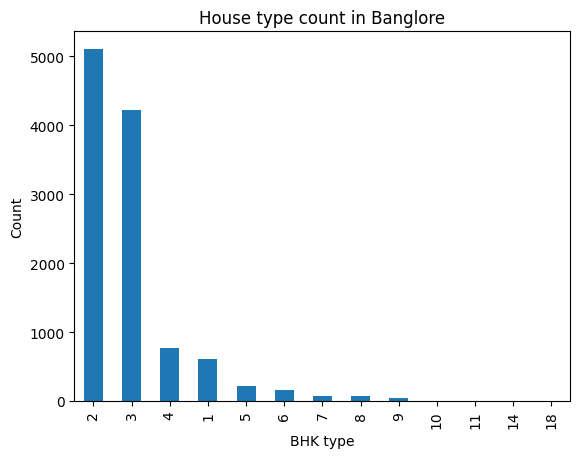

In [91]:
df7['bhk'].value_counts().plot(kind='bar')
plt.xlabel('BHK type')
plt.ylabel('Count')
plt.title('House type count in Banglore')
plt.show()

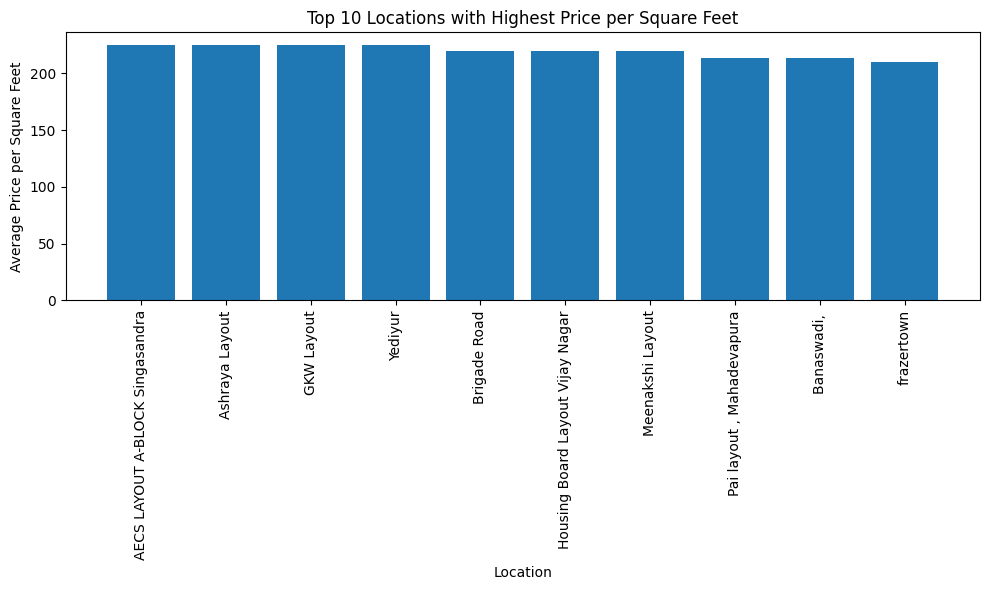

Location
AECS LAYOUT A-BLOCK Singasandra     225.0
Ashraya Layout                      225.0
GKW Layout                          225.0
Yediyur                             225.0
Brigade Road                        220.0
Housing Board Layout Vijay Nagar    220.0
Meenakshi Layout                    220.0
Pai layout , Mahadevapura           214.0
Banaswadi,                          214.0
frazertown                          210.0
Name: Price_per_sqft, dtype: float64


In [92]:
#finding top 10 locations with highest price per sqft

#Grouping the data by 'Location' and calculating the mean price per square feet for each location
location_price = df7.groupby('Location')['Price_per_sqft'].mean().sort_values(ascending=False)

#The top 10 locations with the highest price per square feet
top_10_locations = location_price.head(10)

#Ploting the bar chart to visualize the top 10 locations
plt.figure(figsize=(10, 6))
plt.bar(top_10_locations.index, top_10_locations.values)
plt.xlabel('Location')
plt.ylabel('Average Price per Square Feet')
plt.title('Top 10 Locations with Highest Price per Square Feet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(top_10_locations)

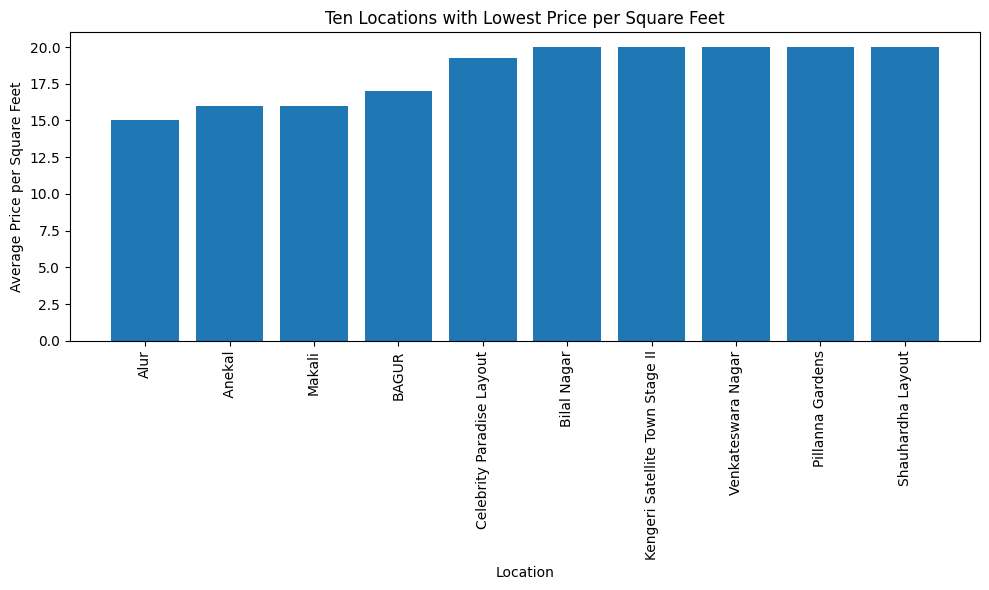

Location
Alur                               15.000
 Anekal                            16.000
Makali                             16.000
BAGUR                              17.000
Celebrity Paradise Layout          19.245
Bilal Nagar                        20.000
Kengeri Satellite Town Stage II    20.000
Venkateswara Nagar                 20.000
Pillanna Gardens                   20.000
Shauhardha Layout                  20.000
Name: Price_per_sqft, dtype: float64


In [94]:
#finding the 10 locations with lowest price per sqft

location_price = df7.groupby('Location')['Price_per_sqft'].mean().sort_values(ascending=True)
bottom_10_locations = location_price.head(10)

#Bar chart to visualize the bottom 10 locations
plt.figure(figsize=(10, 6))
plt.bar(bottom_10_locations.index, bottom_10_locations.values)
plt.xlabel('Location')
plt.ylabel('Average Price per Square Feet')
plt.title('Ten Locations with Lowest Price per Square Feet')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(bottom_10_locations)

### Feature scaling

In [96]:
#here we are standardising the columns having numerical values before ML model generation
#cleaned dataset is df5
dfN=df5
dfN

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13309,Yeshwanthpur,3 BHK,1675.0,3.0,92.13,3
13310,Rachenahalli,2 BHK,1050.0,2.0,52.71,2
13312,Bellandur,2 BHK,1262.0,2.0,47.00,2
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3


In [97]:
#import library
from sklearn.preprocessing import StandardScaler

#Selecting the columns  to scale
cols_to_scale = ['Total_sqft_area_available', 'Bathrooms_available','Price_per_sqft','bhk']

#Creating a StandardScaler object
scaler = StandardScaler()

#Fitting the scaler to the selected columns
scaler.fit(dfN[cols_to_scale])

#Transforming the selected columns using the scaler
dfN[cols_to_scale] = scaler.transform(dfN[cols_to_scale])


In [98]:
dfN

,Location,Type,Total_sqft_area_available,Bathrooms_available,Price_per_sqft,bhk
0,Electronic City Phase II,2 BHK,-0.342385,-0.466962,-0.936215,-0.593660
1,Chikka Tirupathi,4 Bedroom,1.276792,2.175403,0.897666,1.178750
2,Uttarahalli,3 BHK,0.060312,-0.466962,-0.416619,0.292545
3,Lingadheeranahalli,3 BHK,0.145256,0.413827,0.331164,0.292545
4,Kothanur,2 BHK,-0.191374,-0.466962,-0.665880,-0.593660
...,...,...,...,...,...,...
13309,Yeshwanthpur,3 BHK,0.306754,0.413827,0.266129,0.292545
13310,Rachenahalli,2 BHK,-0.348677,-0.466962,-0.627132,-0.593660
13312,Bellandur,2 BHK,-0.126355,-0.466962,-0.756521,-0.593660
13314,Green Glen Layout,3 BHK,0.348702,0.413827,0.716385,0.292545


In [ ]:
#--The End--